# Make heatmaps of DEA
This will allows us to compare gene down in HIC2 but up in DASA.

In [1]:
suppressWarnings(suppressMessages({
    library(ggplot2)
    library(dplyr)
    library(RColorBrewer)
    library(Seurat)
    library(Signac)
    library(pheatmap)
    library(data.table)
    library(ComplexHeatmap)
    library(stats)
    library(rtracklayer)
}))


In [2]:
# hic2_subset <- hic2_de[hic2_de$avg_log2FC < -0.5,]
# head(hic2_subset)
# nt_subset <- nt_de[nt_de$avg_log2FC > 0.5,]
# head(nt_subset)

# # find intersection between the 2
# shared_genes <- intersect(hic2_subset$X, nt_subset$X)
# shared_genes

In [3]:
# load integrated sobj
sobj <- readRDS(file = "07_outputs_ngc/07_objects/07_end_integrated_sobj.rds")
DefaultAssay <- "SCT"
# drop atac assay that's causing issues
#sobj[["ATAC"]] <- NULL

In [4]:
Idents(sobj) <- sobj$treatment_and_guidecapture

In [5]:
Idents(sobj) <- sobj$treatment_and_guidecapture
nt_de <- FindMarkers(sobj, ident.1 = "DASA_NT", ident.2 = "DMSO_NT", 
                             only.pos = F, test.use = "wilcox", min.pct = 0.5)

In [6]:
tail(nt_de)

p_val     avg_log2FC pct.1 pct.2 p_val_adj
HIVEP1 0.2949881 0.1126560  0.574 0.585 1        
RSRC2  0.3087063 0.1198648  0.577 0.598 1        
EFCAB2 0.6611047 0.1058060  0.570 0.591 1        
TYW1   0.6808008 0.1161541  0.458 0.501 1        
RBM41  0.7820181 0.1410482  0.508 0.546 1        
ORC4   0.8092848 0.1123868  0.474 0.508 1

In [7]:
head(nt_de)

p_val avg_log2FC pct.1 pct.2 p_val_adj
AL034397.3 0     -6.754621  0.034 0.877 0        
ALAS2      0      4.365577  0.943 0.151 0        
SLC2A3     0     -6.734971  0.012 0.774 0        
KCNQ5      0     -4.091444  0.186 0.911 0        
BLVRB      0      3.984956  0.987 0.282 0        
C17orf99   0      5.392256  0.725 0.039 0

In [8]:
dim(nt_de)

[1] 1889    5

In [9]:
min(nt_de$avg_log2FC)

[1] -6.754621

In [10]:
rownames(nt_de)

[1] "AL034397.3"  "ALAS2"       "SLC2A3"      "KCNQ5"       "BLVRB"      
   [6] "C17orf99"    "HBA1"        "BHLHE40"     "PKM"         "LDHA"       
  [11] "BCAT1"       "ACTG1"       "MIF"         "AC079804.3"  "FGF13"      
  [16] "KEL"         "TGFBR1"      "MYB"         "SLC30A10"    "TESC"       
  [21] "PKHD1L1"     "PDE4DIP"     "PIM1"        "TMSB4X"      "ENO1"       
  [26] "PRKN"        "RHOH"        "GARS"        "CR1L"        "ERMAP"      
  [31] "ASAH1"       "CELF2"       "PTH2R"       "DDX21"       "AC107223.1" 
  [36] "CTSL"        "COL18A1"     "HBZ"         "ZNF431"      "LAPTM4B"    
  [41] "CPQ"         "GAPDH"       "COMT"        "PSAP"        "HBG1"       
  [46] "EPB41L2"     "GYPA"        "GYPE"        "HSP90B1"     "AL713998.1" 
  [51] "NCOA1"       "RPS17"       "RPS6"        "SLC25A37"    "NPM1"       
  [56] "ZFPM2"       "HBG2"        "ACTB"        "TCF4"        "GYPB"       
  [61] "PTMA"        "RPL15"       "AC008825.1"  "PLCG2"       "RPL23"      
  [66] "SMYD3"       "RPS16"       "GP1BB"       "RPS19"       "LINC02163"  
  [71] "APOE"        "STXBP5"      "RPLP2"       "APOC1"       "RPS2"       
  [76] "RPL14"       "RPL19"       "RPS18"       "RPL37A"      "RPS23"      
  [81] "EEF1A1"      "RPS12"       "RPLP1"       "SNHG5"       "HSPD1"      
  [86] "RPLP0"       "RPS29"       "NME2"        "ABO"         "PGK1"       
  [91] "AC079801.1"  "RPS7"        "MTHFD2"      "NPL"         "RPSA"       
  [96] "RELN"        "SLC1A5"      "RPL13A"      "LAPTM5"      "VIM"        
 [101] "IQGAP2"      "SOCS2"       "CTSH"        "SLC25A21"    "IARS"       
 [106] "MGST1"       "LY6E"        "NARF"        "AC087235.1"  "EGFL7"      
 [111] "LGR4"        "RPL23A"      "TNFAIP8"     "RPL5"        "MYC"        
 [116] "SERPINF1"    "H3F3A"       "RAN"         "H2AFZ"       "RPL37"      
 [121] "FAM83A"      "RANBP1"      "NDUFC2"      "RPS5"        "SLC38A2"    
 [126] "ARL15"       "RUNX1"       "CTSC"        "CHCHD2"      "LINC02506"  
 [131] "RPL6"        "RPL7"        "CENPF"       "TSPAN32"     "RPL21"      
 [136] "CCDC18-AS1"  "SAMSN1"      "NCL"         "HSP90AB1"    "YARS"       
 [141] "FAM210B"     "NME1"        "PRSS57"      "ITPR1"       "RPL10"      
 [146] "STON2"       "MYL4"        "FTL"         "TMEM97"      "RPL32"      
 [151] "GAL"         "ASH2L"       "NBAS"        "SCD"         "RPL41"      
 [156] "DOCK2"       "PRKCE"       "RACK1"       "SLC39A8"     "CMTM6"      
 [161] "GAB2"        "RPL27A"      "MBNL1"       "MTHFD1L"     "MT-ND3"     
 [166] "TANC2"       "CRYM"        "EIF4A1"      "RPL13"       "PABPC1"     
 [171] "TANGO2"      "TOMM20"      "AMOTL1"      "RPL18"       "ITFG1"      
 [176] "RPL10A"      "PRKCB"       "RPS3"        "HIST1H4C"    "FAM102B"    
 [181] "C1QBP"       "FAXDC2"      "PAICS"       "SNRPB"       "RPS8"       
 [186] "YDJC"        "LMO2"        "XACT"        "RPL22"       "PDIA6"      
 [191] "HSPE1"       "FAM178B"     "ALOX12-AS1"  "LTBP1"       "THRB"       
 [196] "CYP3A5"      "PPA1"        "TMSB10"      "AC025171.1"  "RPL39"      
 [201] "RSRP1"       "AL135878.1"  "COCH"        "ASPM"        "RPL18A"     
 [206] "CMSS1"       "RPS25"       "PVT1"        "TBL1X"       "TXNIP"      
 [211] "SLC22A23"    "SPTBN1"      "EIF1"        "MTDH"        "PIK3CB"     
 [216] "VCL"         "SPRED2"      "SNHG3"       "RESF1"       "PPIA"       
 [221] "RPS14"       "TMEM116"     "PFN1"        "ABCB10"      "KLHDC10"    
 [226] "RPL3"        "AC008875.3"  "TPI1"        "KCNQ1OT1"    "RPS20"      
 [231] "PRKDC"       "RPL36A"      "SLC4A7"      "PRDX4"       "LRPPRC"     
 [236] "RPS15A"      "HSPA9"       "EEF1B2"      "PTPRG"       "CRNDE"      
 [241] "HNRNPA2B1"   "RAB27A"      "RSL1D1"      "RPL27"       "RPL17"      
 [246] "GNL3"        "RPS9"        "CKLF"        "RTN4"        "GART"       
 [251] "TOP2A"       "SNRPD1"      "TPX2"        "CCT5"        "EIF3A"      
 [256] "SET"         "EIF4EBP1"    "RPL12"       "RPS24"       "EPB41L4A"   

In [11]:
gene_list <- c(rownames(nt_de)[nt_de$avg_log2FC > 0.5], rownames(nt_de)[nt_de$avg_log2FC < (-0.5)])

In [12]:
length(gene_list)

[1] 1144

In [13]:
sobj

An object of class Seurat 
344955 features across 7994 samples within 4 assays 
Active assay: SCT (22084 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 3 other assays present: ATAC, RNA, PRTB
 5 dimensional reductions calculated: integrated_lsi, atac.umap, pca, rna.umap, wnn.umap

In [14]:
sobj[["ATAC"]] <- NULL
# subset set feature space for share genes
sub_sobj <- subset(sobj, features = gene_list)

# subset for cells of interest
Idents(sub_sobj) <- sub_sobj$treatment_and_guidecapture
sub_sobj <- subset(sub_sobj, idents = c("DASA_HIC2", "DASA_NT", "DMSO_NT"))
sub_sobj

An object of class Seurat 
2874 features across 4651 samples within 3 assays 
Active assay: SCT (1144 features, 494 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, PRTB
 5 dimensional reductions calculated: integrated_lsi, atac.umap, pca, rna.umap, wnn.umap

In [15]:
cell_types <- c("DASA_HIC2", "DASA_NT", "DMSO_NT")

In [16]:
all(rownames(sub_sobj) == gene_list)

[1] TRUE

In [17]:
# Initialize an empty data frame to store results
mean_expression <- data.frame(matrix(ncol = length(cell_types), nrow = length(gene_list)))
rownames(mean_expression) <- gene_list
colnames(mean_expression) <- cell_types

# Calculate mean expression
for (cell_type in cell_types) {
    temp <- subset(sub_sobj, idents = cell_type)
    mean_expression[, cell_type] <- rowMeans(GetAssayData(temp, assay = "SCT"))
}

In [18]:
# library(data.table)
# mean_expression_scaled <- as.data.table(t(scale(t(mean_expression))))
# rownames(mean_expression_scaled) <- rownames(mean_expression)
# mean_expression_sorted <- mean_expression_scaled[order(-mean_expression_scaled$DASA_HIC2),]

In [19]:
# Scale the rows
mean_expression_scaled <- as.data.frame(t(scale(t(mean_expression))))

# Add row names (gene names) as a new column
mean_expression_scaled$gene <- rownames(mean_expression_scaled)

# Reorder the columns to have gene names in the first column
mean_expression_scaled <- mean_expression_scaled[c("gene", setdiff(names(mean_expression_scaled), "gene"))]

# Sort based on DASA_HIC2
mean_expression_sorted <- mean_expression_scaled[order(-mean_expression_scaled$DASA_HIC2), ]

# View the sorted, scaled data frame
mean_expression_sorted$gene <- NULL
mean_expression_sorted <- mean_expression_sorted[c("DMSO_NT", "DASA_NT", "DASA_HIC2")]
print(mean_expression_sorted)


               DMSO_NT     DASA_NT    DASA_HIC2
ZNF83      -0.79815239 -0.32356796  1.121720349
PRDX2      -0.85825913 -0.23985732  1.098116449
WIPF3      -0.88243210 -0.20375309  1.086185188
ATF7IP2    -0.88961755 -0.19271413  1.082331685
TMEM14C    -0.93372051 -0.12146321  1.055183725
SGMS1      -0.98065888 -0.03762048  1.018279359
HBA1       -0.98337433 -0.03246089  1.015835228
ANK1       -1.00626219  0.01264429  0.993617900
VPS13D     -1.00899251  0.01823440  0.990758107
SLC44A5    -1.06550349  0.14736008  0.918143412
SLC39A8    -1.06832379  0.15467117  0.913652622
MARCH3     -1.08179366  0.19119431  0.890599354
RABGAP1L   -1.08793987  0.20887274  0.879067128
RHBDD1     -1.09182671  0.22043552  0.871391195
GYPC       -1.09980791  0.24524527  0.854562640
HLTF       -1.10311761  0.25601073  0.847106872
FAM210B    -1.10550876  0.26398496  0.841523805
MYO6       -1.11047943  0.28114744  0.829331991
KIF9-AS1   -1.11071418  0.28197914  0.828735040
CR1L       -1.11139682  0.28440922  0.82

In [20]:
head(mean_expression_sorted)

DMSO_NT    DASA_NT     DASA_HIC2
ZNF83   -0.7981524 -0.32356796 1.121720 
PRDX2   -0.8582591 -0.23985732 1.098116 
WIPF3   -0.8824321 -0.20375309 1.086185 
ATF7IP2 -0.8896176 -0.19271413 1.082332 
TMEM14C -0.9337205 -0.12146321 1.055184 
SGMS1   -0.9806589 -0.03762048 1.018279

Warning message:
“The input is a data frame, convert it to the matrix.”
Warning message:
“argument `kmeans_k` is not suggested to use in pheatmap -> Heatmap
translation because it changes the input matrix. You might check
`row_km` and `column_km` arguments in Heatmap().”


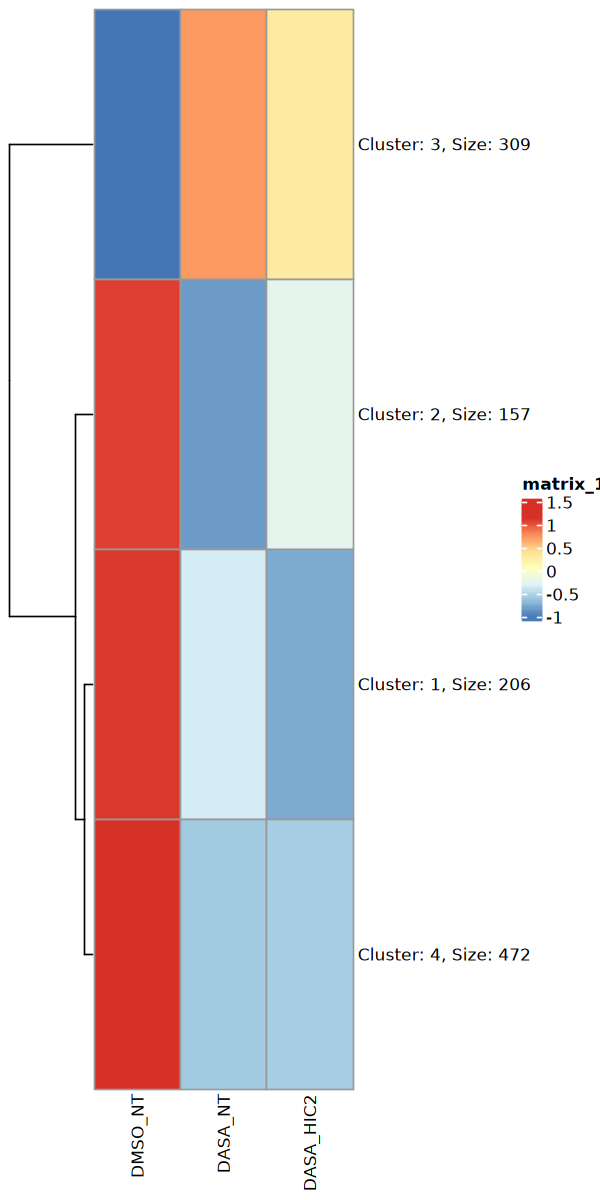

In [21]:
options(repr.plot.width=5, repr.plot.height=10)
p1 <- pheatmap(mean_expression_sorted, cluster_cols = FALSE, cluster_rows = TRUE, clustering_method = "ward.D2", kmeans_k = 4, show_colnames = TRUE)
p1

Warning message:
“The input is a data frame, convert it to the matrix.”


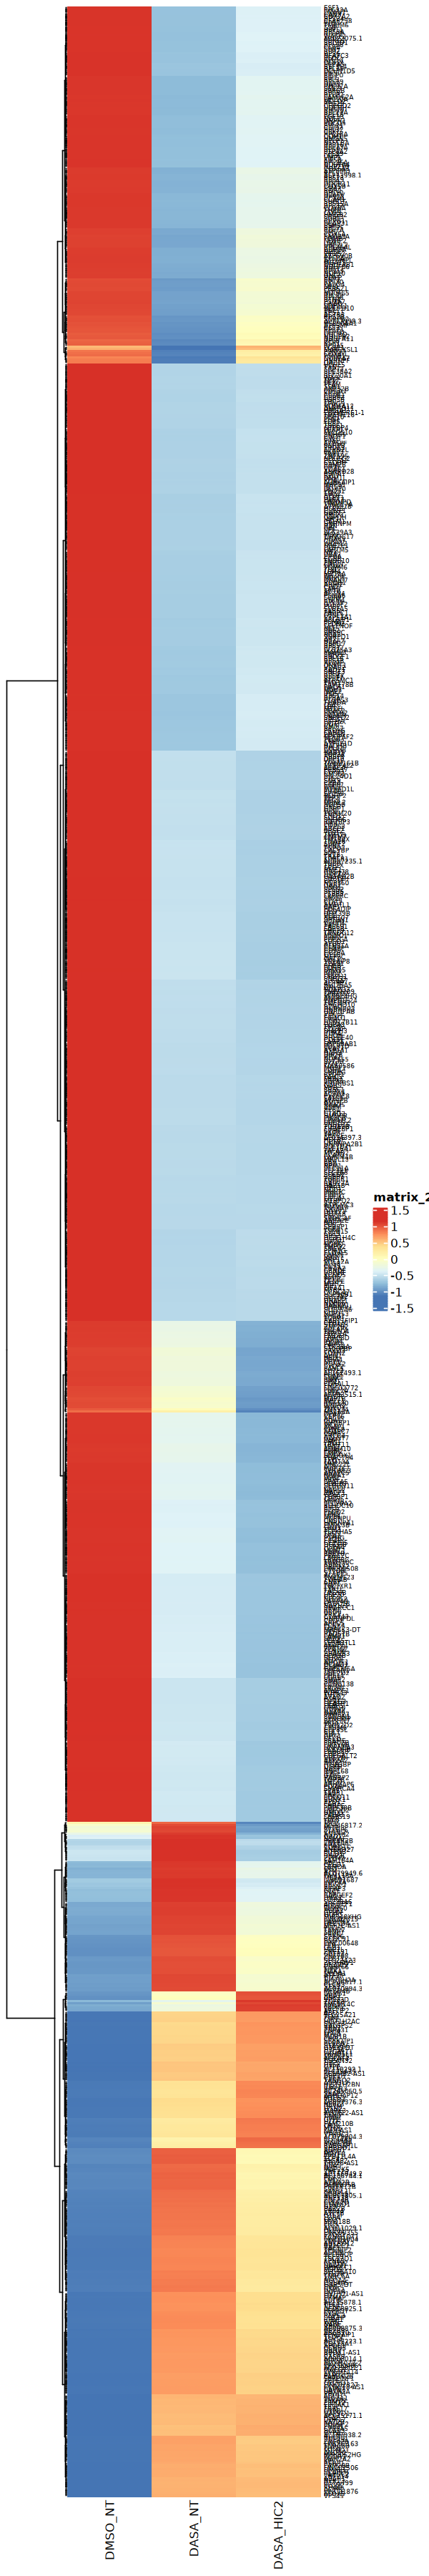

In [22]:
options(repr.plot.width=5, repr.plot.height=30)
pheatmap(mean_expression_sorted, cluster_cols = FALSE, cluster_rows = TRUE, clustering_method = "ward.D2", kmeans_k = NA, show_colnames = TRUE, fontsize_row = 5)

Warning message:
“The input is a data frame, convert it to the matrix.”


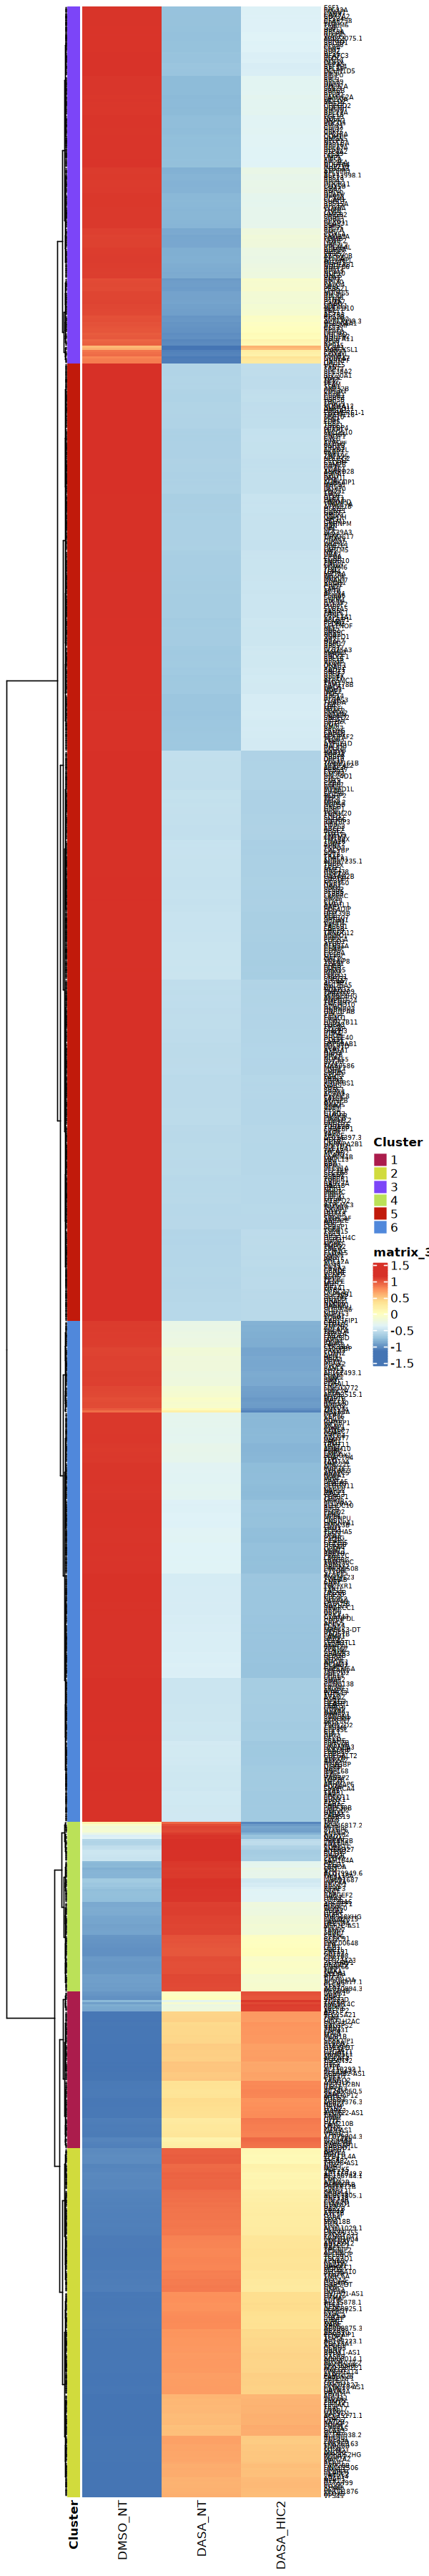

In [23]:
df <- mean_expression_sorted
# Perform hierarchical clustering on the rows (genes)
hc_genes <- hclust(dist(df, method = "euclidean"), method = "ward.D2")

# Cut the dendrogram into 4 clusters
gene_clusters <- cutree(hc_genes, k = 6)

# Create a factor for cluster membership and add it as a column annotation
cluster_annotation <- data.frame(Cluster = factor(gene_clusters))
rownames(cluster_annotation) <- rownames(df)

# Draw the heatmap
pheatmap(df, 
         cluster_rows = hc_genes, 
         annotation_row = cluster_annotation, 
         show_rownames = TRUE,
         cluster_cols = FALSE,
         fontsize_row = 5)

# KMEANS

In [24]:
df <- mean_expression_sorted

In [25]:
set.seed(1234567)
# Perform k-means clustering on the rows (genes)
kmeans_result <- kmeans((df), centers = 6, iter.max = 1000, nstart = 10)  # Transpose df because kmeans works on rows

# Create a factor for cluster membership
cluster_membership <- factor(kmeans_result$cluster)

# Create annotation data frame
annotation <- data.frame(Cluster = cluster_membership)

In [26]:
all(rownames(annotation) == rownames(df))

[1] TRUE

In [27]:
df$cluster = annotation$Cluster

In [28]:

df <- df[order(df$cluster),]
cluster <- df$cluster
head(df)
# write.csv(df, file = "13_dasa_hic2_dasa_nt_dmso_nt_mean_expression_dea_clustered.csv", row.names=T)
df$cluster <- NULL
head(df)

DMSO_NT    DASA_NT  DASA_HIC2   cluster
STX16   -0.9821716 1.016922 -0.03475081 1      
DNAJC9  -0.9742348 1.023913 -0.04967864 1      
C5orf66 -0.9739573 1.024152 -0.05019493 1      
ZC3HAV1 -0.9731425 1.024851 -0.05170865 1      
PI4KA   -0.9697613 1.027718 -0.05795660 1      
NCOA1   -0.9688636 1.028470 -0.05960632 1

DMSO_NT    DASA_NT  DASA_HIC2  
STX16   -0.9821716 1.016922 -0.03475081
DNAJC9  -0.9742348 1.023913 -0.04967864
C5orf66 -0.9739573 1.024152 -0.05019493
ZC3HAV1 -0.9731425 1.024851 -0.05170865
PI4KA   -0.9697613 1.027718 -0.05795660
NCOA1   -0.9688636 1.028470 -0.05960632

In [49]:
levels(cluster_df$Cluster)

[1] "1" "2" "3" "4" "5" "6"

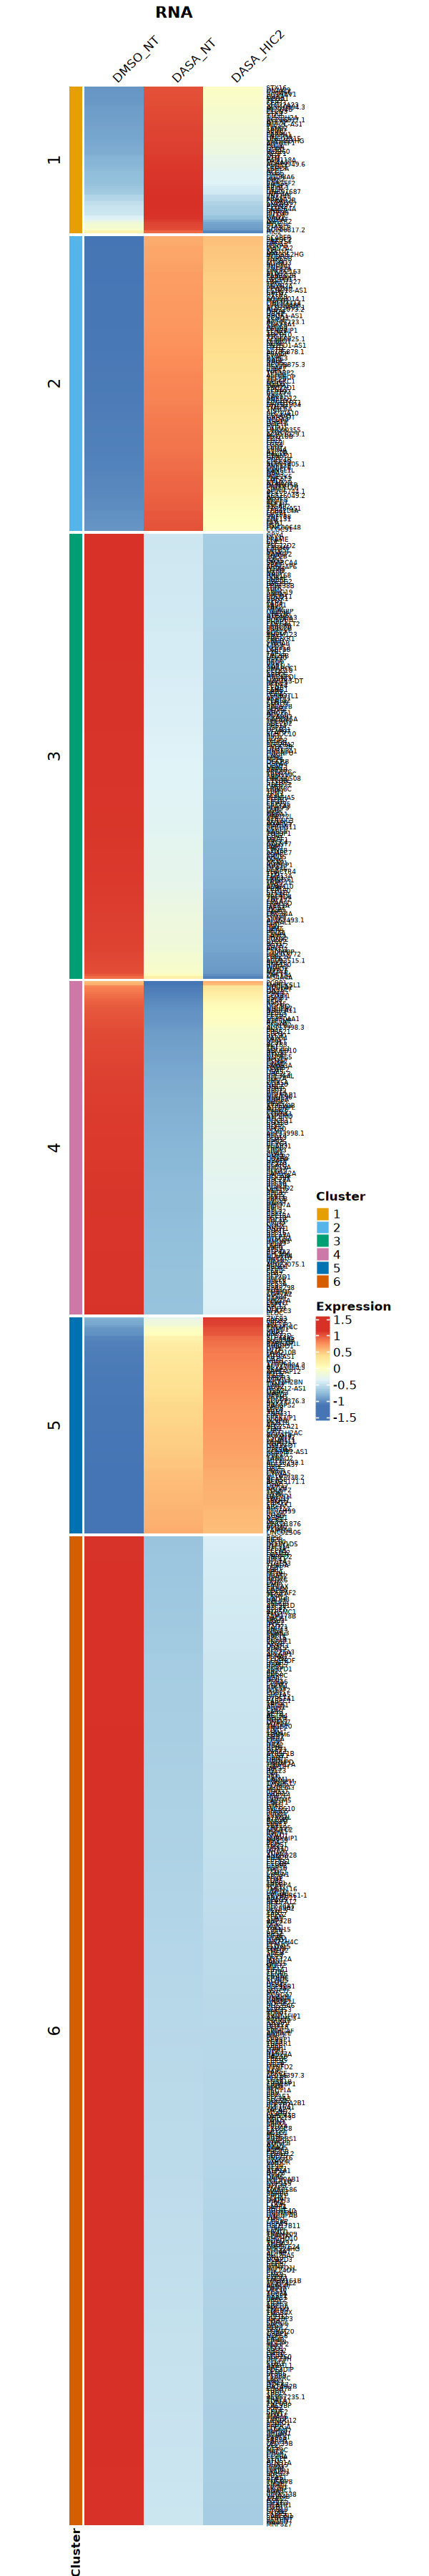

In [58]:
cluster_colors <- c(
    "1" = "#E69F00",  # Orange
    "2" = "#56B4E9",  # Sky blue
    "3" = "#009E73",  # Bluish green
    "4" = "#CC79A7",  # Pink
    "5" = "#0072B2",  # Blue
    "6" = "#D55E00"   # Vermillion
)

# Ensure 'cluster' is a factor and create a data frame for annotation
cluster_df <- data.frame(Cluster = factor(cluster))

# Draw the heatmap
ComplexHeatmap::pheatmap(as.matrix(df),
    show_rownames = TRUE,
    annotation_row = cluster_df,
    annotation_colors = list(Cluster = cluster_colors),
    cluster_rows = FALSE,
    cluster_cols = FALSE,
    fontsize_row = 5,
    cellwidth = 50,
    heatmap_legend_param = list(title = "Expression"),
    legend = TRUE,
    main = "RNA",
    column_names_side = "top",
    row_split = cluster_df$Cluster,
    angle_col = "45"
)

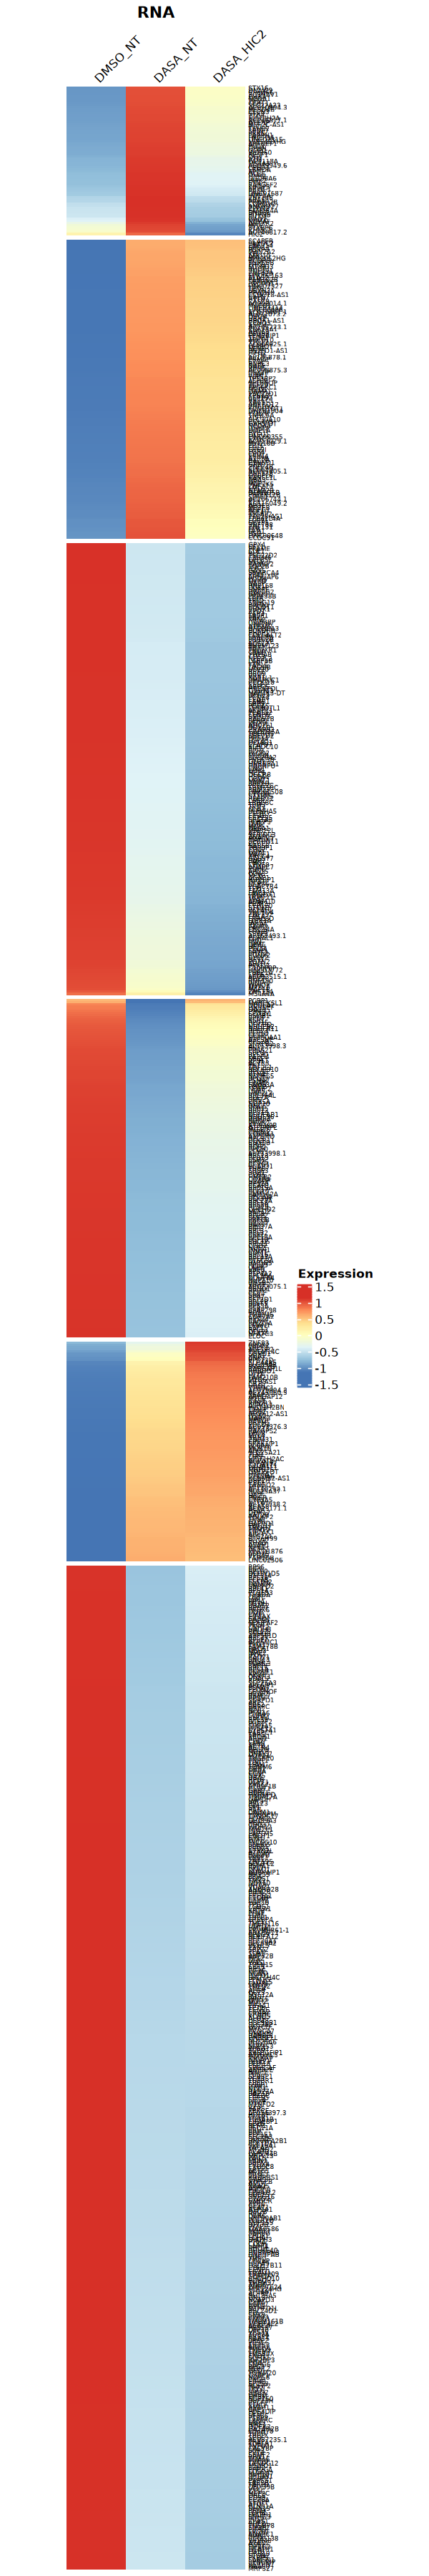

In [61]:
# Create splits for the rows based on cluster
row_splits <- factor(cluster)

# Draw the heatmap
ComplexHeatmap::pheatmap(as.matrix(df),
    show_rownames = TRUE,
    cluster_rows = FALSE,
    cluster_cols = FALSE,
    fontsize_row = 5,
    cellwidth = 50,
    heatmap_legend_param = list(title = "Expression"),
    legend = TRUE,
    main = "RNA",
    column_names_side = "top",
    gaps_row = cumsum(table(row_splits))[-length(table(row_splits))],  # Add gaps between clusters
    angle_col = "45"
)

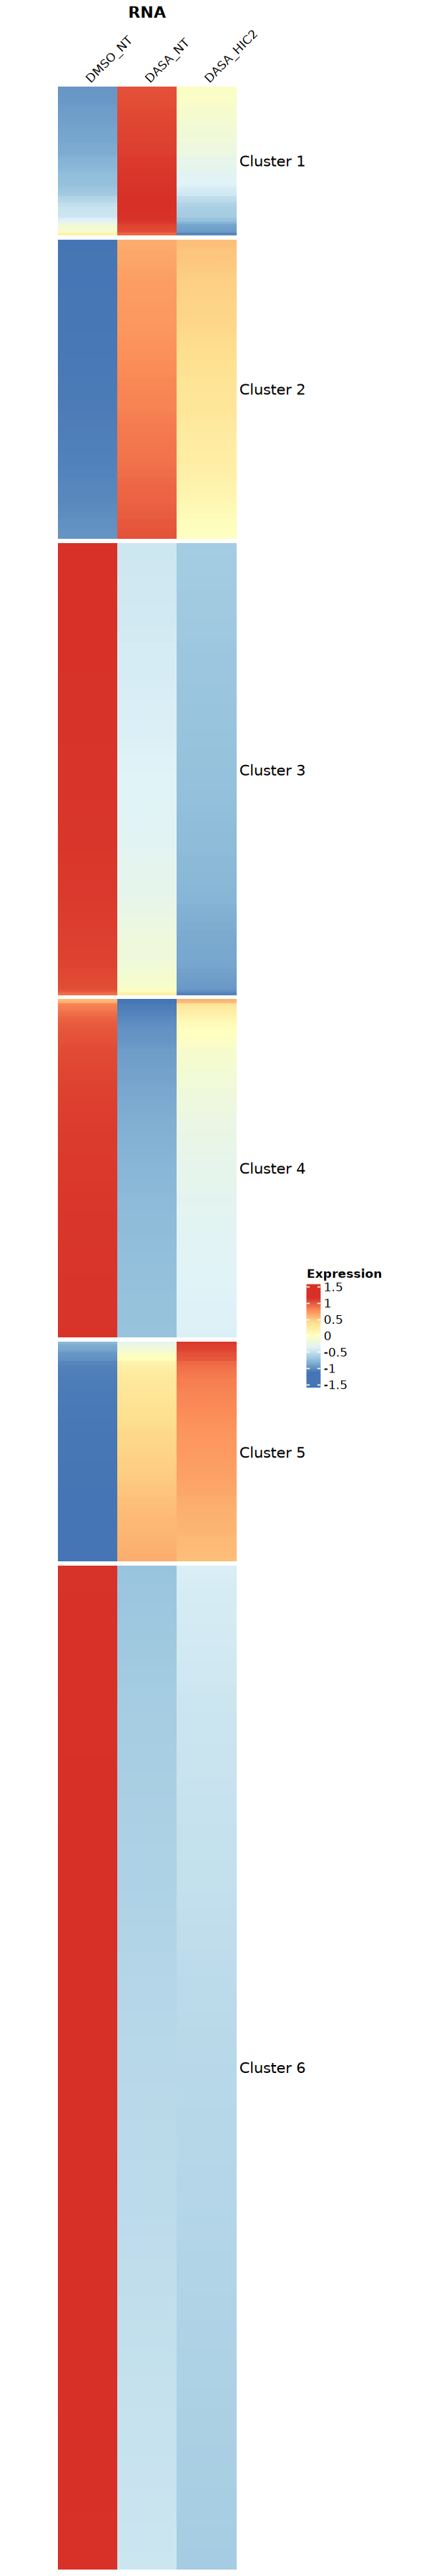

In [65]:
# Create a vector of cluster numbers for labels
clusters <- factor(cluster)
n_rows <- length(clusters)

# Create row labels that are centered within each cluster
row_labels <- rep("", n_rows)
cluster_sizes <- table(clusters)
cluster_midpoints <- c()
current_pos <- 1

# Calculate midpoints for each cluster
for(i in seq_along(cluster_sizes)) {
    midpoint <- current_pos + floor(cluster_sizes[i]/2)
    cluster_midpoints[i] <- midpoint
    current_pos <- current_pos + cluster_sizes[i]
}

# Place cluster labels at midpoints
for(i in seq_along(unique(clusters))) {
    row_labels[cluster_midpoints[i]] <- paste("Cluster", i)
}

# Draw the heatmap
ComplexHeatmap::pheatmap(as.matrix(df),
    show_rownames = TRUE,
    labels_row = row_labels,
    cluster_rows = FALSE,
    cluster_cols = FALSE,
    fontsize_row = 12,  # Increased font size
    cellwidth = 50,
    heatmap_legend_param = list(title = "Expression"),
    legend = TRUE,
    main = "RNA",
    column_names_side = "top",
    gaps_row = cumsum(table(clusters))[-length(table(clusters))],
    angle_col = "45"
)

# ATAC
Some naming issues that I didn't fix yet. Restart kernel, load libs, and start running from here.

In [2]:
cell_types <- c("DMSO_NT", "DASA_NT", "DASA_HIC2")

In [3]:
# load integrated sobj
sobj <- readRDS(file = "07_outputs_ngc/07_objects/07_end_integrated_sobj.rds")
Idents(sobj) <- sobj$treatment_and_guidecapture
DefaultAssay(sobj) <- "ATAC"

# # subset set feature space for share genes
# sub_sobj <- subset(sobj, features = gene_list)

# # subset for cells of interest
# Idents(sub_sobj) <- sub_sobj$treatment_and_guidecapture
sub_sobj <- subset(sobj, idents = cell_types)
sub_sobj

An object of class Seurat 
344955 features across 4651 samples within 4 assays 
Active assay: ATAC (279098 features, 0 variable features)
 3 other assays present: SCT, RNA, PRTB
 5 dimensional reductions calculated: integrated_lsi, atac.umap, pca, rna.umap, wnn.umap

In [10]:
GetAssayData(sub_sobj, assay = "ATAC")

  [[ suppressing 31 column names ‘DASA1_AAACAGCCAGTTTGTG-1’, ‘DASA1_AAACCGAAGGCGCTTA-1’, ‘DASA1_AAACGCGCAAACAACA-1’ ... ]]

  [[ suppressing 31 column names ‘DASA1_AAACAGCCAGTTTGTG-1’, ‘DASA1_AAACCGAAGGCGCTTA-1’, ‘DASA1_AAACGCGCAAACAACA-1’ ... ]]

  [[ suppressing 31 column names ‘DASA1_AAACAGCCAGTTTGTG-1’, ‘DASA1_AAACCGAAGGCGCTTA-1’, ‘DASA1_AAACGCGCAAACAACA-1’ ... ]]



279098 x 4651 sparse Matrix of class "dgCMatrix"
                                                                                         
chr1-9739-10688        .         .         .        .        .        .         .        
chr1-15699-16633       .         .         .        .        .        .         .        
chr1-17113-17962       .         .         .        .        .        .         .        
chr1-28862-29719       .         .         .        .        .        .         .        
chr1-30453-31327       .         .         .        .        .        .         .        
chr1-104544-105438     .         .         .        .        .        .         .        
chr1-115273-116185     .         .         .        .        .        .         .        
chr1-134746-135542     .         .         .        .        .        .         .        
chr1-136191-137115     .         .         .        .        .        .         .        
chr1-138689-139586     .         .         .       

In [4]:
atac_dea <- read.csv("07_outputs_ngc/07_results/atac/DASA_HIC2_vs_DASA_NT_da_markers.csv", row.names = 1)

In [5]:
head(atac_dea)
dim(atac_dea)

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
chr4-168257537-168258490 4.623357e-53 5.596211   0.181 0.003 1.290370e-47
chr7-128116669-128117601 3.204012e-50 5.531988   0.168 0.004 8.942334e-45
chr3-10763876-10765358   1.545156e-41 5.493037   0.141 0.003 4.312499e-36
chr11-69264362-69265503  3.149171e-32 5.299103   0.115 0.003 8.789273e-27
chr10-69107390-69108284  9.910451e-29 5.068601   0.104 0.003 2.765987e-23
chr11-44916483-44917470  1.125400e-40 4.910012   0.147 0.006 3.140969e-35

[1] 7145    5

In [6]:
gene_list <- rownames(atac_dea)

In [7]:
# subset set feature space for da peaks
sub_sobj <- subset(sub_sobj, features = rownames(atac_dea))

In [8]:
sub_sobj

An object of class Seurat 
7145 features across 4651 samples within 1 assay 
Active assay: ATAC (7145 features, 0 variable features)
 4 dimensional reductions calculated: integrated_lsi, atac.umap, rna.umap, wnn.umap

In [9]:
cell_types

[1] "DMSO_NT"   "DASA_NT"   "DASA_HIC2"

In [10]:
# Initialize an empty data frame to store results
mean_expression <- data.frame(matrix(ncol = length(cell_types), nrow = length(gene_list)))
colnames(mean_expression) <- cell_types
rownames(mean_expression) <- rownames(sub_sobj)

# Calculate mean expression
for (cell_type in cell_types) {
    temp <- subset(sub_sobj, idents = cell_type)
    temp <- GetAssayData(temp, assay = "ATAC")
    temp <- temp[rownames(temp) %in% gene_list,]
    mean_expression[, cell_type] <- rowMeans(temp)
}

In [11]:
head(mean_expression)

DMSO_NT     DASA_NT    DASA_HIC2
chr4-168257537-168258490 0.005578971 0.01405200 0.6845131
chr7-128116669-128117601 0.017200030 0.01300171 0.6061088
chr3-10763876-10765358   0.006427560 0.01312387 0.5954628
chr11-69264362-69265503  0.014799399 0.01218512 0.4835916
chr10-69107390-69108284  0.007131137 0.01390372 0.4698420
chr11-44916483-44917470  0.011322941 0.01921620 0.5806412

In [12]:
# quanitfy difference
# Calculate the standard deviation for each row and create a new column
mean_expression$Difference = apply(mean_expression, 1, function(x) sd(x))

# Now, sort the data frame by the 'Difference' column in descending order
mean_expression <- mean_expression[order(-mean_expression$Difference), ]

# Filter to get the top 100 most different rows
top_n <- head(mean_expression, 1500)


top_n$Difference <- NULL
# View the top 100 rows
head(top_n)


DMSO_NT     DASA_NT    DASA_HIC2
chr22-19933251-19934308 0.045518025 0.05161919 1.0723377
chr22-23191892-23192845 0.082561622 0.14888042 1.0891380
chr11-64598853-64599781 0.004191188 0.03071697 0.8343558
chr22-29733698-29734558 0.019825118 0.03249312 0.8170334
chr1-34825288-34826201  0.066319979 0.12166634 0.8558612
chr22-23099970-23100900 0.103842108 0.19675282 0.9024195

In [13]:
# # trying to add the methylation data
# # List of genomic coordinates
# coordinates <- rownames(mean_expression)

# # Convert coordinates to GRanges
# gr_coordinates <- GRanges(
#     seqnames = sapply(strsplit(coordinates, "-"), `[`, 1),
#     ranges = IRanges(
#         start = as.numeric(sapply(strsplit(coordinates, "-"), `[`, 2)),
#         end = as.numeric(sapply(strsplit(coordinates, "-"), `[`, 3))
#     )
# )

# # Path to your bigBed file
# bigbed_file <- "ENCFF233ODK.bigBed"

# # Import the bigBed file
# peaks <- import(bigbed_file)

# # Initialize a vector to store the counts
# peak_counts <- integer(length(gr_coordinates))
# names(peak_counts) <- names(gr_coordinates)

# # Loop through each coordinate and count overlaps
# for (i in seq_along(gr_coordinates)) {
#     overlap_hits <- findOverlaps(peaks, gr_coordinates[i])
#     peak_counts[i] <- length(unique(queryHits(overlap_hits)))
# }

# peak_counts

# length(peak_counts)

# # add to mean expression df
# mean_expression$ENCFF031FSF <- peak_counts


In [14]:
mean_expression <- top_n

In [15]:
# Scale the rows
mean_expression_scaled <- as.data.frame(t(scale(t(mean_expression))))

# Sort based on DASA_HIC2
mean_expression_sorted <- mean_expression_scaled[order(-mean_expression_scaled$DASA_HIC2), ]


In [16]:
head(mean_expression_sorted)

DMSO_NT    DASA_NT    DASA_HIC2
chr2-119229586-119230483  -0.5775237 -0.5771768 1.154701 
chr3-184345409-184346291  -0.5779273 -0.5767730 1.154700 
chr1-36187810-36188711    -0.5767123 -0.5779880 1.154700 
chr1-2104458-2105407      -0.5784314 -0.5762684 1.154700 
chr20-47201050-47201973   -0.5788972 -0.5758020 1.154699 
chr12-120602153-120603100 -0.5791063 -0.5755924 1.154699

Warning message:
“The input is a data frame, convert it to the matrix.”


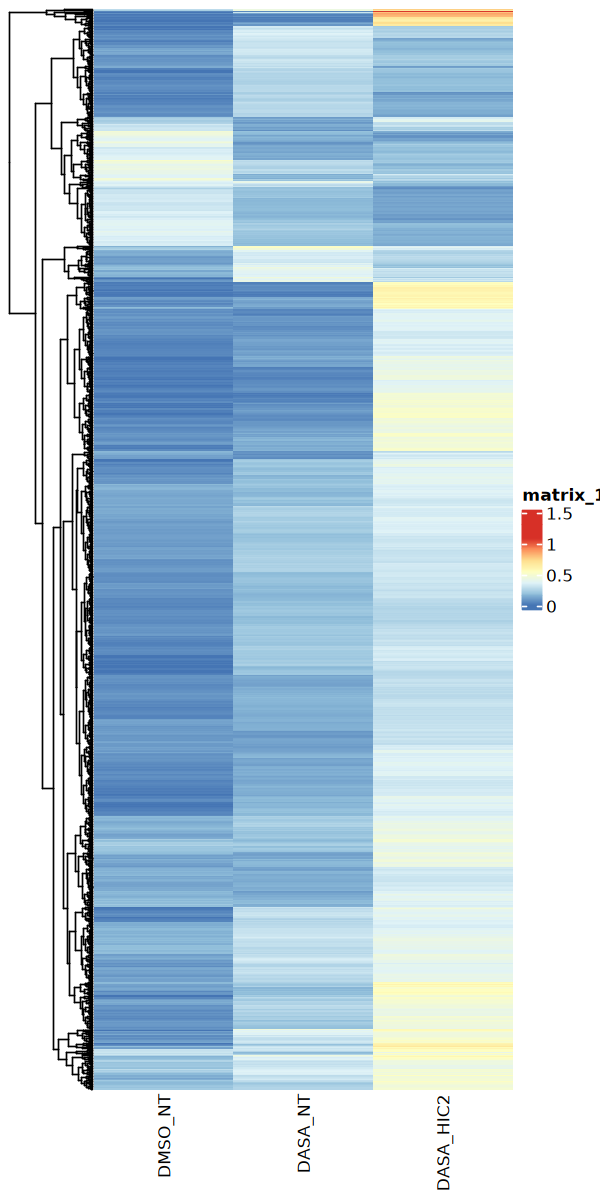

In [17]:
# unscaled looks bad
options(repr.plot.width=5, repr.plot.height=10)
pheatmap(mean_expression, cluster_rows = T, cluster_cols = F, show_rownames = F)

Warning message:
“The input is a data frame, convert it to the matrix.”


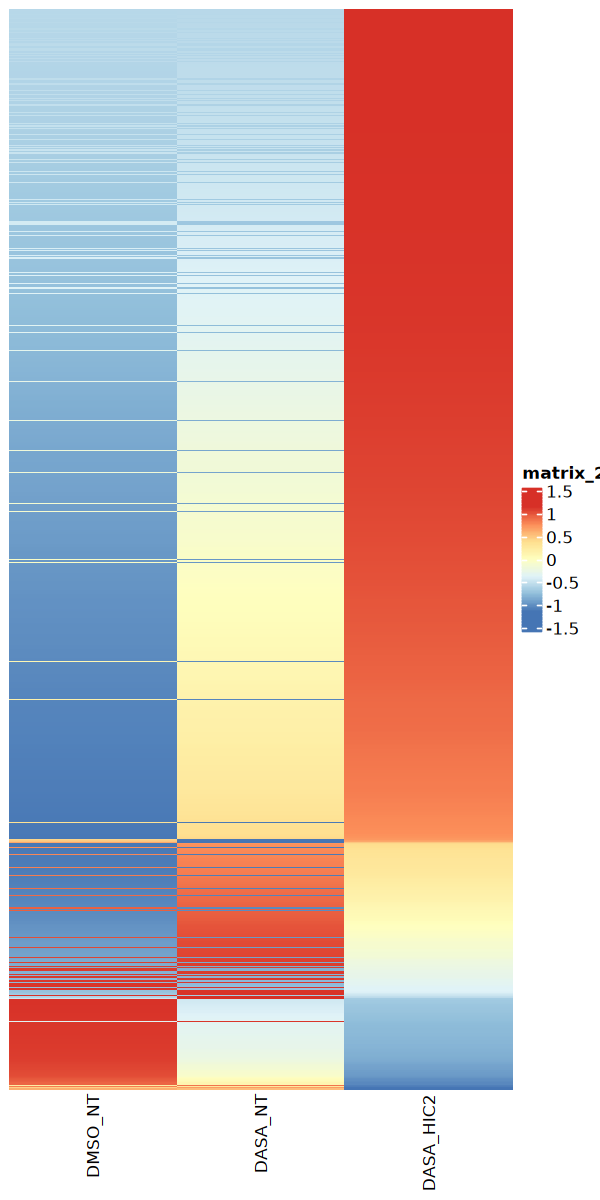

In [18]:
pheatmap(mean_expression_sorted, cluster_rows = F, cluster_cols = F, show_rownames = F)

Warning message:
“The input is a data frame, convert it to the matrix.”


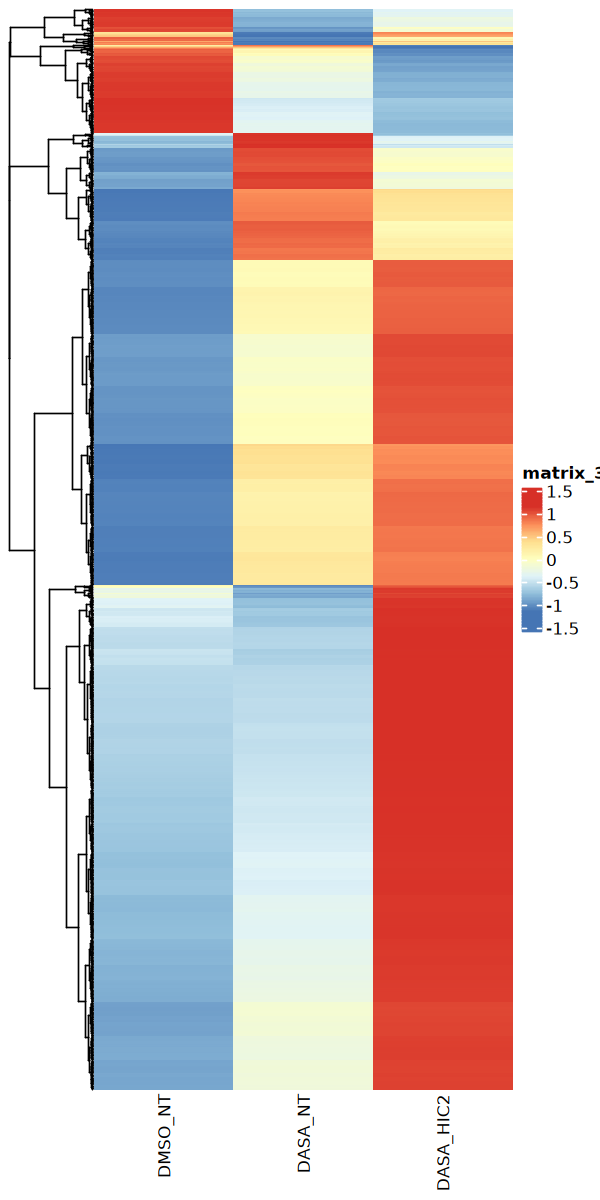

In [19]:
pheatmap(mean_expression_sorted, cluster_rows = T, cluster_cols = F, show_rownames = F)

In [20]:
df <- mean_expression_sorted
# Perform k-means clustering on the rows (genes)
kmeans_result <- kmeans((df), centers = 6)  # Transpose df because kmeans works on rows

# Create a factor for cluster membership
cluster_membership <- factor(kmeans_result$cluster)

# Create annotation data frame
annotation <- data.frame(Cluster = cluster_membership)
df$cluster = annotation$Cluster


df <- df[order(df$cluster),]
cluster <- df$cluster
head(df)
write.csv(df, file = "13_dasa_hic2_dasa_nt_dmso_nt_mean_expression_atac_da_clustered2.csv", row.names=T)
df$cluster <- NULL
head(df)

# Ensure 'cluster' is a factor and create a data frame for annotation
cluster_df <- data.frame(Cluster = factor(cluster))

# Define colors for the annotation
# The names should match the levels of the factor 'Cluster'
cluster_colors <- setNames(c("red", "blue", "green", "yellow", "black", "white"), levels(cluster_df$Cluster))



DMSO_NT   DASA_NT   DASA_HIC2 cluster
chr22-21946220-21946985  -1.141274 0.7226922 0.4185814 1      
chr9-93576053-93576906   -1.140149 0.7283295 0.4118198 1      
chr3-178679835-178680663 -1.135997 0.7472549 0.3887423 1      
chr11-68120277-68120987  -1.135745 0.7483213 0.3874241 1      
chr10-136001-136688      -1.135731 0.7483804 0.3873511 1      
chr1-186288093-186289195 -1.133993 0.7555288 0.3784645 1

DMSO_NT   DASA_NT   DASA_HIC2
chr22-21946220-21946985  -1.141274 0.7226922 0.4185814
chr9-93576053-93576906   -1.140149 0.7283295 0.4118198
chr3-178679835-178680663 -1.135997 0.7472549 0.3887423
chr11-68120277-68120987  -1.135745 0.7483213 0.3874241
chr10-136001-136688      -1.135731 0.7483804 0.3873511
chr1-186288093-186289195 -1.133993 0.7555288 0.3784645

Warning message:
“The input is a data frame, convert it to the matrix.”


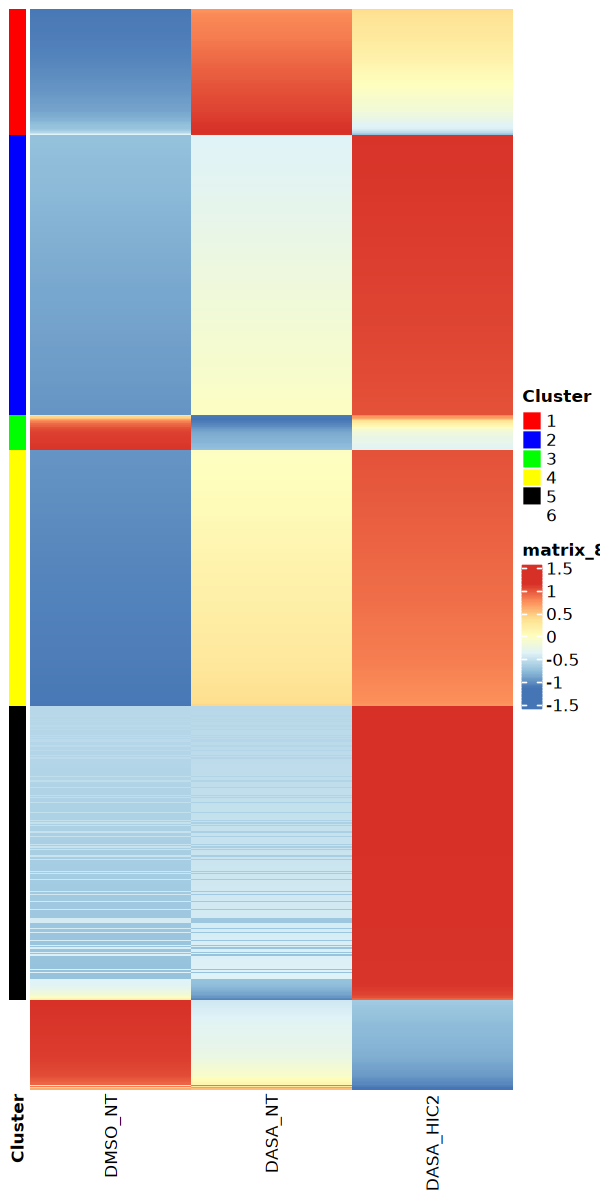

In [26]:
# Draw the heatmap
pheatmap(df, 
         show_rownames = FALSE,
         annotation_row = cluster_df, 
         annotation_colors = list(Cluster = cluster_colors),
         cluster_rows = FALSE,  # Turn off clustering in pheatmap
         cluster_cols = FALSE,
         fontsize_row = 5)

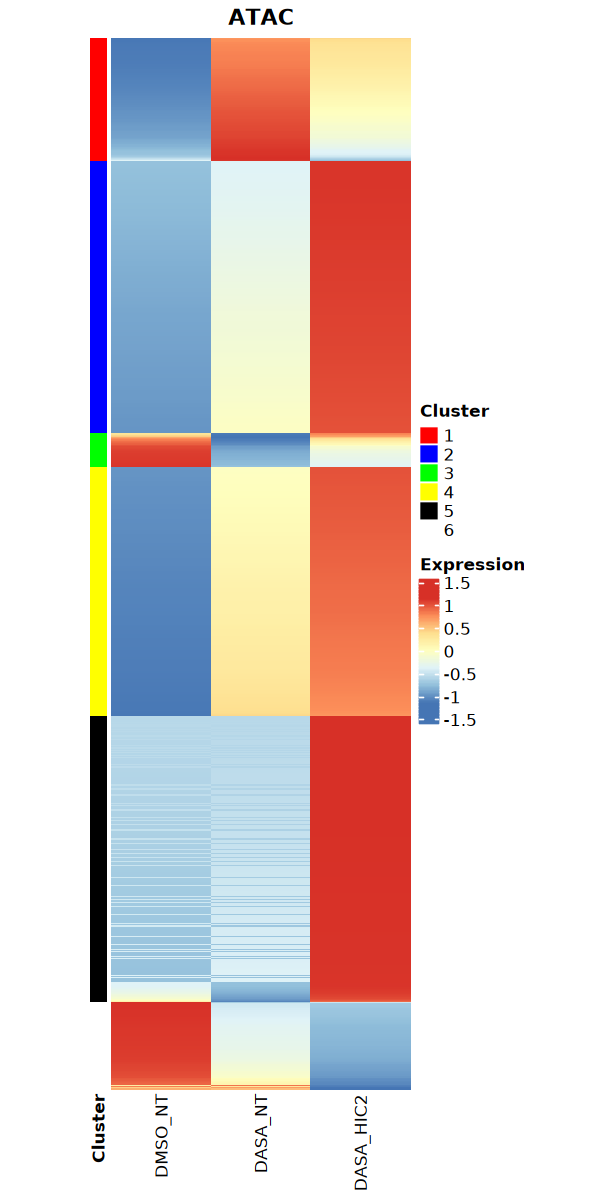

In [36]:
# Draw the heatmap
ComplexHeatmap::pheatmap(as.matrix(df), 
         show_rownames = FALSE,
         annotation_row = cluster_df, 
         annotation_colors = list(Cluster = cluster_colors),
         cluster_rows = FALSE,  # Turn off clustering in pheatmap
         cluster_cols = FALSE,
         fontsize_row = 5,
         heatmap_legend_param = list(title = "Expression"),
         legend = T,
         cellwidth=60,
         main = "ATAC"
         )